# 2. Data GeoPandas Shapefile

The purpose of this notebook is to merge the cleaned datasets into a GeoPandas shapefile.

In [3]:
import shapefile
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import random

In [4]:
random.seed(6)

### Read in and clean Texas Shapefile to match ACS SNAP info

In [5]:
sf = shapefile.Reader('../datasets/texasshp/tl_2017_48_tract.shp')

In [6]:
df_tx = gpd.read_file('../datasets/texasshp/tl_2017_48_tract.shp')

In [7]:
df_snap = pd.read_csv('../cleaned_datasets/SNAPinfoTX.csv')

In [8]:
df_pov = pd.read_csv('../cleaned_datasets/PovertyinfoTX.csv')

In [9]:
df_snap.shape, df_pov.shape

((5265, 6), (5265, 11))

In [10]:
df_snap.head(2)

,id,geoid,households,below_poverty,hh_snap,hh_nowork
0,48001950100,"Census Tract 9501, Anderson County, Texas",1790,295,163,23.9
1,48001950401,"Census Tract 9504.01, Anderson County, Texas",95,0,0,0.0


Same number of rows! 

In [11]:
df_tx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   5265 non-null   object  
 1   COUNTYFP  5265 non-null   object  
 2   TRACTCE   5265 non-null   object  
 3   GEOID     5265 non-null   object  
 4   NAME      5265 non-null   object  
 5   NAMELSAD  5265 non-null   object  
 6   MTFCC     5265 non-null   object  
 7   FUNCSTAT  5265 non-null   object  
 8   ALAND     5265 non-null   int64   
 9   AWATER    5265 non-null   int64   
 10  INTPTLAT  5265 non-null   object  
 11  INTPTLON  5265 non-null   object  
 12  geometry  5265 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 534.9+ KB


In [12]:
df_snap.info(), df_pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5265 non-null   int64 
 1   geoid          5265 non-null   object
 2   households     5265 non-null   int64 
 3   below_poverty  5265 non-null   int64 
 4   hh_snap        5265 non-null   int64 
 5   hh_nowork      5265 non-null   object
dtypes: int64(4), object(2)
memory usage: 246.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5265 non-null   int64 
 1   geoid        5265 non-null   object
 2   population   5265 non-null   int64 
 3   below50pov   5265 non-null   int64 
 4   below125pov  5265 non-null   int64 
 5   below150pov  5265 non-null   int64 
 6   below185pov  5265 non-null   int64 
 7   below200pov  5265

(None, None)

So in the GDB, the geoid is an object, while in the other 2, it's an int (id refers to what GEOID is on the gdb)

In [13]:
df_tx['GEOID'] = df_tx['GEOID'].astype('int64')

In [14]:
df_tx.columns = [x.lower() for x in df_tx.columns]

#### Merge SNAP data with shapefile

In [15]:
df_tx = df_tx.merge(df_snap, left_on='geoid',right_on='id')

In [16]:
df_snap[df_snap['id']==48201542301] #just checking it joined where it ought to

,id,geoid,households,below_poverty,hh_snap,hh_nowork
2963,48201542301,"Census Tract 5423.01, Harris County, Texas",4081,152,181,2.5


In [17]:
df_tx = df_tx.merge(df_pov,left_on='geoid_x',right_on='id')

In [18]:
df_pov[df_pov['id']==48201542301] #''

,id,geoid,population,below50pov,below125pov,below150pov,below185pov,below200pov,below300pov,below400pov,below500pov
2963,48201542301,"Census Tract 5423.01, Harris County, Texas",14366,265,1299,1952,3181,3696,6695,9614,11731


In [19]:
df_tx.drop(columns=['id_x','id_y','geoid_y'],inplace=True)

In [20]:
df_tx['geoid']

0       Census Tract 5423.01, Harris County, Texas
1       Census Tract 5526.01, Harris County, Texas
2       Census Tract 6738, Fort Bend County, Texas
3       Census Tract 6740, Fort Bend County, Texas
4       Census Tract 6741, Fort Bend County, Texas
                           ...                    
5260    Census Tract 119.03, Cameron County, Texas
5261    Census Tract 140.02, Cameron County, Texas
5262       Census Tract 114, Cameron County, Texas
5263    Census Tract 124.01, Cameron County, Texas
5264       Census Tract 116, Cameron County, Texas
Name: geoid, Length: 5265, dtype: object

In [21]:
df_tx['geoid_x']

0       48201542301
1       48201552601
2       48157673800
3       48157674000
4       48157674100
           ...     
5260    48061011903
5261    48061014002
5262    48061011400
5263    48061012401
5264    48061011600
Name: geoid_x, Length: 5265, dtype: int64

In [22]:
df_tx.rename(columns={'geoid':'tract_name','geoid_x':'geoid'},inplace=True)

In [23]:
df_tx = df_tx[['statefp', 'countyfp', 'tractce', 'geoid', 'name', 'namelsad', 'mtfcc',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'households',
       'below_poverty', 'hh_snap', 'hh_nowork', 'tract_name', 'population',
       'below50pov', 'below125pov', 'below150pov', 'below185pov', 'below200pov',
       'below300pov', 'below400pov', 'below500pov', 'geometry']]

## Read in other datasets

In [24]:
cancer_df = pd.read_csv('../cleaned_datasets/cancer_rates.csv')

refinery_df = pd.read_csv('../cleaned_datasets/combined_texas_refinery_risks_emissions.csv')

## Clean up column names

- limited to 10 characters
- drop unnecessary columns from individual files

In [25]:
cancer_df.columns

Index(['Unnamed: 0', 'Year', 'StateAbbr', 'CountyFIPS', 'LocationName',
       'DataSource', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'TotalPopulation', 'Geolocation', 'LocationID'],
      dtype='object')

In [26]:
cancer_df.columns = ['drop_1','drop_2','drop_3','county_num','tract_num','drop_4','drop_5','drop_6','drop_7','cancer_%','cancer_%_l','cancer_%_h','total_pop','geo_loc','drop_8']

cancer_df.drop(columns=['drop_1', 'drop_2', 'drop_3', 'drop_4', 'drop_5', 'drop_6', 'drop_7', 'drop_8'], inplace=True)

cancer_df.head(1)

,county_num,tract_num,cancer_%,cancer_%_l,cancer_%_h,total_pop,geo_loc
0,48005,48005000102,6.5,6.3,6.7,4447,POINT (-94.87095395 31.32711676)


In [27]:
df_tx.columns

Index(['statefp', 'countyfp', 'tractce', 'geoid', 'name', 'namelsad', 'mtfcc',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'households',
       'below_poverty', 'hh_snap', 'hh_nowork', 'tract_name', 'population',
       'below50pov', 'below125pov', 'below150pov', 'below185pov',
       'below200pov', 'below300pov', 'below400pov', 'below500pov', 'geometry'],
      dtype='object')

In [28]:
df_tx.columns = ['drop_1', 'drop_2', 'drop_3', 'tract_num', 'drop_4', 'drop_5', 'mtfcc',
       'drop_6', 'aland', 'awater', 'intptlat', 'intptlon', 'households',
       'below_pove', 'hh_snap', 'hh_nowork', 'tract_name', 'drop_7',
       'below50pov', 'below125po', 'below150po', 'below185po', 'below200po',
       'below300po', 'below400po', 'below500po', 'geometry']

df_tx.drop(columns=['drop_1', 'drop_2', 'drop_3', 'drop_4', 'drop_5', 'drop_6', 'drop_7'], inplace=True)

df_tx.head(1)

,tract_num,mtfcc,aland,awater,intptlat,intptlon,households,below_pove,hh_snap,hh_nowork,tract_name,below50pov,below125po,below150po,below185po,below200po,below300po,below400po,below500po,geometry
0,48201542301,G5020,5956733,15456,+29.8204990,-095.7316493,4081,152,181,2.5,"Census Tract 5423.01, Harris County, Texas",265,1299,1952,3181,3696,6695,9614,11731,"POLYGON ((-95.75224 29.83169, -95.75104 29.831..."


In [29]:
refinery_df.columns

Index(['tract', 'company', 'corp', 'number_refineries', 'county', 'population',
       'respiratory_hi', 'neurological_hi', 'developmental_hi',
       'reproductive_hi', 'kidney_hi', 'immunological_hi', 'whole_body_hi',
       'total_cancer_risk_(per_million)',
       'pt-stationarypoint_cancer_risk_(per_million)',
       'benzene_cancer_risk_(per_million)',
       'coke_oven_emissions_cancer_risk_(per_million)',
       '1,3-butadiene_cancer_risk_(per_million)', 'benzene_(year_2017_tons)',
       'toluene_(year_2017_tons)', 'ethyl_benzene_(year_2017_tons)',
       'xylenes_(mixed_isomers)_(year_2017_tons)',
       'diesel_pm_(year_2017_tons)', '2,2,4-trimethylpentane_(year_2017_tons)',
       'coke_oven_emissions_(year_2017_tons)',
       '1,3-butadiene_(year_2017_tons)'],
      dtype='object')

In [30]:
refinery_df.columns = ['tract_num','company','corp','num_refine','county','drop_1','respir_hi','neurol_hi','develop_hi',
                       'reprodu_hi','kidney_hi','immuno_hi','tot_bod_hi','total_r/m','ptstat_r/m','benzen_r/m','coke_r/m',
                       'butadi_r/m','benzene_t','toluene_t','eth_benz_t','xylenes_t','diesel_t','trimeth_t','coke_t','butadien_t']

refinery_df.drop(columns='drop_1', inplace=True)

refinery_df.head(1)

,tract_num,company,corp,num_refine,county,respir_hi,neurol_hi,develop_hi,reprodu_hi,kidney_hi,...,coke_r/m,butadi_r/m,benzene_t,toluene_t,eth_benz_t,xylenes_t,diesel_t,trimeth_t,coke_t,butadien_t
0,48000000000,No refineries,No refineries,0.0,Entire State,0.4,0.03,0.03,0.03,0.008,...,0.0,0.480044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for duplicate column names

- just tract_num for joining

In [31]:
[col for col in cancer_df.columns if col in df_tx.columns or col in refinery_df.columns]

['tract_num']

In [32]:
[col for col in refinery_df.columns if col in df_tx.columns or col in cancer_df.columns]

['tract_num']

In [33]:
[col for col in df_tx.columns if col in cancer_df.columns or col in refinery_df.columns]

['tract_num']

## Join dataframes into one and save to shape file

In [34]:
print(df_tx.shape)
print(refinery_df.shape)
print(cancer_df.shape)

(5265, 20)
(5493, 25)
(5222, 7)


In [35]:
combined = refinery_df.merge(cancer_df, on='tract_num', how='left')

combined = combined.merge(df_tx, on='tract_num', how='left')

combined_gpd = gpd.GeoDataFrame(combined,geometry='geometry')

combined_gpd.columns

Index(['tract_num', 'company', 'corp', 'num_refine', 'county', 'respir_hi',
       'neurol_hi', 'develop_hi', 'reprodu_hi', 'kidney_hi', 'immuno_hi',
       'tot_bod_hi', 'total_r/m', 'ptstat_r/m', 'benzen_r/m', 'coke_r/m',
       'butadi_r/m', 'benzene_t', 'toluene_t', 'eth_benz_t', 'xylenes_t',
       'diesel_t', 'trimeth_t', 'coke_t', 'butadien_t', 'county_num',
       'cancer_%', 'cancer_%_l', 'cancer_%_h', 'total_pop', 'geo_loc', 'mtfcc',
       'aland', 'awater', 'intptlat', 'intptlon', 'households', 'below_pove',
       'hh_snap', 'hh_nowork', 'tract_name', 'below50pov', 'below125po',
       'below150po', 'below185po', 'below200po', 'below300po', 'below400po',
       'below500po', 'geometry'],
      dtype='object')

In [36]:
type(combined_gpd)

geopandas.geodataframe.GeoDataFrame

In [37]:
combined_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5493 entries, 0 to 5492
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tract_num   5493 non-null   int64   
 1   company     5493 non-null   object  
 2   corp        5493 non-null   object  
 3   num_refine  5493 non-null   float64 
 4   county      5493 non-null   object  
 5   respir_hi   5493 non-null   float64 
 6   neurol_hi   5493 non-null   float64 
 7   develop_hi  5493 non-null   float64 
 8   reprodu_hi  5493 non-null   float64 
 9   kidney_hi   5493 non-null   float64 
 10  immuno_hi   5493 non-null   float64 
 11  tot_bod_hi  5493 non-null   float64 
 12  total_r/m   5493 non-null   int64   
 13  ptstat_r/m  5493 non-null   float64 
 14  benzen_r/m  5493 non-null   float64 
 15  coke_r/m    5493 non-null   float64 
 16  butadi_r/m  5493 non-null   float64 
 17  benzene_t   867 non-null    float64 
 18  toluene_t   867 non-null    float64 
 19

In [38]:
combined_gpd.to_file('../cleaned_datasets/all_data_shape/all_data_shape.shp', index=False)

## Create another shapefile for the Tableau with additional data

In [43]:
tri = pd.read_csv('../cleaned_datasets/tri_2017_tx_cleaned.csv')

In [44]:
combined_tri = combined_gpd.merge(tri, left_on='tract_num', right_on='tract', how='left')

In [45]:
combined_tri = combined_tri[combined_tri['geometry'] != None]

In [46]:
combined_tri['number_facilities'].fillna(0,inplace=True)

In [47]:
combined_tri.columns

Index(['tract_num', 'company', 'corp', 'num_refine', 'county', 'respir_hi',
       'neurol_hi', 'develop_hi', 'reprodu_hi', 'kidney_hi', 'immuno_hi',
       'tot_bod_hi', 'total_r/m', 'ptstat_r/m', 'benzen_r/m', 'coke_r/m',
       'butadi_r/m', 'benzene_t', 'toluene_t', 'eth_benz_t', 'xylenes_t',
       'diesel_t', 'trimeth_t', 'coke_t', 'butadien_t', 'county_num',
       'cancer_%', 'cancer_%_l', 'cancer_%_h', 'total_pop', 'geo_loc', 'mtfcc',
       'aland', 'awater', 'intptlat', 'intptlon', 'households', 'below_pove',
       'hh_snap', 'hh_nowork', 'tract_name', 'below50pov', 'below125po',
       'below150po', 'below185po', 'below200po', 'below300po', 'below400po',
       'below500po', 'geometry', 'tract', 'facility_name', 'industry_sector',
       'number_facilities'],
      dtype='object')

In [48]:
weightavept = (combined_tri['ptstat_r/m']*combined_tri['total_pop']).sum()/(combined_tri['total_pop'].sum())

In [49]:
combined_tri['ptstat_r/m'].mean(), weightavept #not that different

(4.076782082103722, 4.20685538239647)

In [50]:
combined_tri['ptstat_r/m']/weightavept

2       0.090393
3       0.031572
4       0.098055
5       0.034675
6       0.035697
          ...   
5487    0.011362
5489    0.008545
5490    0.001694
5491    0.005665
5492    0.005983
Name: ptstat_r/m, Length: 5238, dtype: float64

In [51]:
combined_tri['weighted_multiple'] = combined_tri['ptstat_r/m']/weightavept

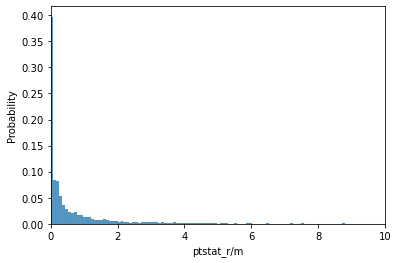

In [52]:
sns.histplot(combined_tri['ptstat_r/m']/weightavept,stat='probability')
plt.xlim([0,10]);

In [53]:
combined_tri['weighted_multiple'].mean() #about what you would expect if this is norming on on the average exposure-> the reason it's not 
#*perfectly* 1 is because it's weighted, and undoing that would require slightly different calculations. But this is just a sanity check

0.9690806342340557

In [55]:
combined_tri.to_file('../cleaned_datasets/all_plus_facilities', index=False)

/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_12733/256039464.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined_tri.to_file('../cleaned_datasets2/all_plus_facilities', index=False)
